In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)
data_raw = pd.read_csv('DREAM_data_T.csv')
data1 = data_raw.copy(deep = True)
data2 = data_raw.copy(deep = True)
data3 = data_raw.copy(deep = True)
data4 = data_raw.copy(deep = True)
data5 = data_raw.copy(deep = True)
data1.head()
data1.info()
data1.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz


In [ ]:
data1.drop(['Unnamed: 0','Disulfiram(ALDH2)','Methylglyoxol(Pyruvate)','Mebendazole(Tubulin)','4-HC(DNA alkylator)'], axis=1, inplace=True)
data1=data1.dropna()
data1.head()
y1 = data1['Everolimus(mTOR)']
data1.drop(['Everolimus(mTOR)'], axis=1, inplace=True)
data1.head()

In [ ]:
data2.drop(['Unnamed: 0','Everolimus(mTOR)','Methylglyoxol(Pyruvate)','Mebendazole(Tubulin)','4-HC(DNA alkylator)'], axis=1, inplace=True)
data2=data2.dropna()
y2 = data2['Disulfiram(ALDH2)']
y2
data2.drop(['Disulfiram(ALDH2)'], axis=1, inplace=True)

In [ ]:
data3.drop(['Unnamed: 0','Everolimus(mTOR)','Disulfiram(ALDH2)','Mebendazole(Tubulin)','4-HC(DNA alkylator)'], axis=1, inplace=True)
data3=data3.dropna()
y3 = data3['Methylglyoxol(Pyruvate)']
y3
data3.drop(['Methylglyoxol(Pyruvate)'], axis=1, inplace=True)

In [ ]:
data4.drop(['Unnamed: 0','Everolimus(mTOR)','Disulfiram(ALDH2)','Methylglyoxol(Pyruvate)','4-HC(DNA alkylator)'], axis=1, inplace=True)
data4=data4.dropna()
y4 = data4['Mebendazole(Tubulin)']
y4
data4.drop(['Mebendazole(Tubulin)'], axis=1, inplace=True)

In [ ]:
data5.drop(['Unnamed: 0','Everolimus(mTOR)','Disulfiram(ALDH2)','Methylglyoxol(Pyruvate)','Mebendazole(Tubulin)'], axis=1, inplace=True)
data5=data5.dropna()
y5 = data5['4-HC(DNA alkylator)']
y5
data5.drop(['4-HC(DNA alkylator)'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X1_train, X1_holdout, y1_train, y1_holdout = train_test_split(data1.values, y1, test_size=0.2,
random_state=17)

tree1 = DecisionTreeClassifier()

tree1.fit(X1_train, y1_train)

from sklearn.metrics import accuracy_score

tree1_pred = tree1.predict(X1_holdout)
print (f" Accuracy for decision tree is {accuracy_score(y1_holdout, tree1_pred)}") 

In [ ]:
X2_train, X2_holdout, y2_train, y2_holdout = train_test_split(data2.values, y2, test_size=0.2,
random_state=17)
X3_train, X3_holdout, y3_train, y3_holdout = train_test_split(data3.values, y3, test_size=0.2,
random_state=17)
X4_train, X4_holdout, y4_train, y4_holdout = train_test_split(data4.values, y4, test_size=0.2,
random_state=17)
X5_train, X5_holdout, y5_train, y5_holdout = train_test_split(data5.values, y5, test_size=0.2,
random_state=17)


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import LeaveOneOut

tree_params = {'max_depth': range(3,11),
               'max_features': range(10,50)}

tree_grid = GridSearchCV(tree1, tree_params, cv = LeaveOneOut(), n_jobs=-1, verbose=True)

tree_grid.fit(X1_train, y1_train)

In [ ]:
print (f"Best parameters are {tree_grid.best_params_}") 

In [ ]:
tree_grid.best_score_ #0.94256322331761677

In [ ]:
accuracy_score(y1_holdout, tree_grid.predict(X1_holdout))

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(1,100)}

tree_grid = GridSearchCV(tree1, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X1_train, y1_train)


In [ ]:
print (f"Best parameters are {tree_grid.best_params_}") 

In [ ]:
tree_grid.best_score_ #0.94256322331761677

In [ ]:
accuracy_score(y1_holdout, tree_grid.predict(X1_holdout))

In [ ]:
y1_pred=tree_grid.predict(X1_holdout)
print(confusion_matrix(y1_holdout,y1_pred))
print(classification_report(y1_holdout,y1_pred))
print(accuracy_score(y1_holdout,y1_pred))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
y1_pred=tree1.predict(X1_holdout)


print(confusion_matrix(y1_holdout,y1_pred))
print(classification_report(y1_holdout,y1_pred))
print(accuracy_score(y1_holdout,y1_pred))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y1_holdout,y1_pred , drop_intermediate=False, pos_label=1)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y1_holdout,y1_pred))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=17)
rf1.fit(X1_train, y1_train)
rf1_pred = rf1.predict(X1_holdout)
print (f" Accuracy for random forest is {accuracy_score(y1_holdout, rf1_pred)}") 

The best performance from the leave-one-out cross-validation:
0.7837837837837838
The parameters for the optimal model:
{'max_depth': 6, 'max_features': 15}
[[11  8]
 [ 9  9]]
              precision    recall  f1-score   support

         0.0       0.55      0.58      0.56        19
         1.0       0.53      0.50      0.51        18

    accuracy                           0.54        37
   macro avg       0.54      0.54      0.54        37
weighted avg       0.54      0.54      0.54        37

0.5405405405405406


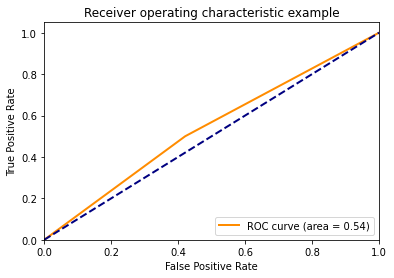

The best performance from the leave-one-out cross-validation:
0.7297297297297297
The parameters for the optimal model:
{'max_depth': 8, 'max_features': 10}
[[ 9 10]
 [ 7 11]]
              precision    recall  f1-score   support

         0.0       0.56      0.47      0.51        19
         1.0       0.52      0.61      0.56        18

    accuracy                           0.54        37
   macro avg       0.54      0.54      0.54        37
weighted avg       0.54      0.54      0.54        37

0.5405405405405406


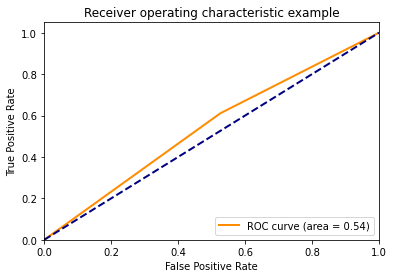

The best performance from the leave-one-out cross-validation:
0.8235294117647058
The parameters for the optimal model:
{'max_depth': 8, 'max_features': 19}
[[12  5]
 [ 5 12]]
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71        17
         1.0       0.71      0.71      0.71        17

    accuracy                           0.71        34
   macro avg       0.71      0.71      0.71        34
weighted avg       0.71      0.71      0.71        34

0.7058823529411765


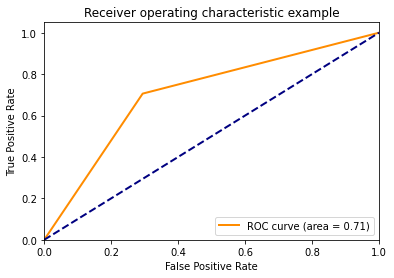

The best performance from the leave-one-out cross-validation:
0.7073170731707317
The parameters for the optimal model:
{'max_depth': 2, 'max_features': 10}
[[ 9 12]
 [ 7 13]]
              precision    recall  f1-score   support

         0.0       0.56      0.43      0.49        21
         1.0       0.52      0.65      0.58        20

    accuracy                           0.54        41
   macro avg       0.54      0.54      0.53        41
weighted avg       0.54      0.54      0.53        41

0.5365853658536586


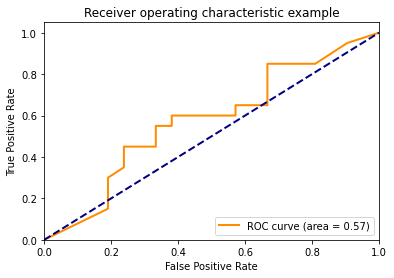

The best performance from the leave-one-out cross-validation:
0.6857142857142857
The parameters for the optimal model:
{'max_depth': 6, 'max_features': 17}
[[10  8]
 [10  7]]
              precision    recall  f1-score   support

         0.0       0.50      0.56      0.53        18
         1.0       0.47      0.41      0.44        17

    accuracy                           0.49        35
   macro avg       0.48      0.48      0.48        35
weighted avg       0.48      0.49      0.48        35

0.4857142857142857


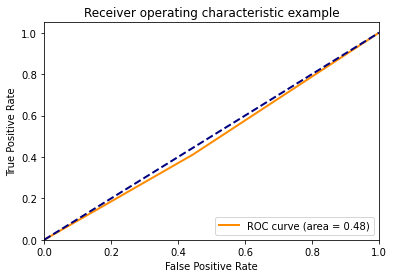

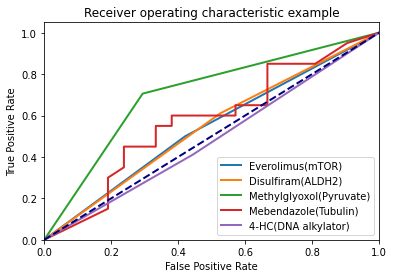

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def knn_gridsearch_evaluate(X, y):
    knn = DecisionTreeClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'max_depth': range(1,11),
               'max_features': range(10,20)}
    # apply LOOCV
    cv = LeaveOneOut()
    
    # use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, n_jobs=-1) # Turn on cv train scores
    # fit model to data
    knn_gscv.fit(X, y)
    
    # check score for the top performing value of n_neighbors
    print("The best performance from the leave-one-out cross-validation:")
    print(knn_gscv.best_score_)
    
    # check the optimal parameters
    print("The parameters for the optimal model:")
    print(knn_gscv.best_params_)
    
    kf = KFold(n_splits=len(X))

    y_pred_list = []
    y_pred_proba_list = []
    knn_best = knn_gscv.best_estimator_
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn_best.fit(X_train, y_train)
        y_pred = knn_best.predict(X_test)
        y_score = knn_best.predict_proba(X_test)[:,1]
        y_pred_list.append(y_pred)
        y_pred_proba_list.append(y_score)
        
    print(confusion_matrix(y, y_pred_list))
    print(classification_report(y, y_pred_list))
    print(accuracy_score(y, y_pred_list))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_list, drop_intermediate=False, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_pred_proba_list))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc.png') # can save to a file
    
    return fpr, tpr

if __name__ == '__main__':
    df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
    df_T = df.T
    df_features = df.iloc[5:].T
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = df_features.loc[df_y1.index]
    df_X2 = df_features.loc[df_y2.index]
    df_X3 = df_features.loc[df_y3.index]
    df_X4 = df_features.loc[df_y4.index]
    df_X5 = df_features.loc[df_y5.index]

    

    # KNN
    fpr1_z, tpr1_z = knn_gridsearch_evaluate(df_X1.to_numpy(), df_y1.values)
    fpr2_z, tpr2_z = knn_gridsearch_evaluate(df_X2.to_numpy(), df_y2.values)
    fpr3_z, tpr3_z = knn_gridsearch_evaluate(df_X3.to_numpy(), df_y3.values)
    fpr4_z, tpr4_z = knn_gridsearch_evaluate(df_X4.to_numpy(), df_y4.values)
    fpr5_z, tpr5_z = knn_gridsearch_evaluate(df_X5.to_numpy(), df_y5.values)

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1_z, tpr1_z,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2_z, tpr2_z,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3_z, tpr3_z,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4_z, tpr4_z,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5_z, tpr5_z,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc_all_z.png')
    

    


The best performance from the leave-one-out cross-validation:
0.7837837837837838
The parameters for the optimal model:
{'max_depth': 5, 'max_features': 33}
[[ 9 10]
 [ 7 11]]
              precision    recall  f1-score   support

         0.0       0.56      0.47      0.51        19
         1.0       0.52      0.61      0.56        18

    accuracy                           0.54        37
   macro avg       0.54      0.54      0.54        37
weighted avg       0.54      0.54      0.54        37

0.5405405405405406


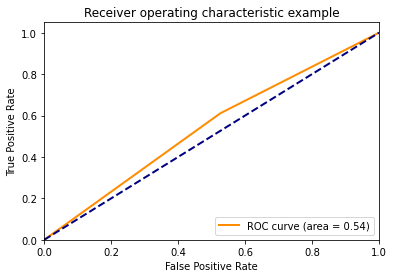

The best performance from the leave-one-out cross-validation:
0.7297297297297297
The parameters for the optimal model:
{'max_depth': 5, 'max_features': 36}
[[ 6 13]
 [10  8]]
              precision    recall  f1-score   support

         0.0       0.38      0.32      0.34        19
         1.0       0.38      0.44      0.41        18

    accuracy                           0.38        37
   macro avg       0.38      0.38      0.38        37
weighted avg       0.38      0.38      0.38        37

0.3783783783783784


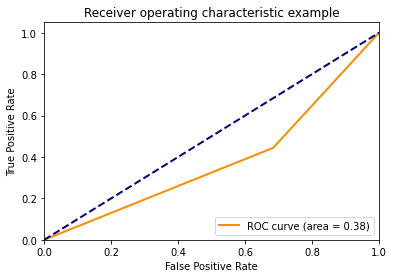

The best performance from the leave-one-out cross-validation:
0.7941176470588235
The parameters for the optimal model:
{'max_depth': 1, 'max_features': 23}
[[12  5]
 [10  7]]
              precision    recall  f1-score   support

         0.0       0.55      0.71      0.62        17
         1.0       0.58      0.41      0.48        17

    accuracy                           0.56        34
   macro avg       0.56      0.56      0.55        34
weighted avg       0.56      0.56      0.55        34

0.5588235294117647


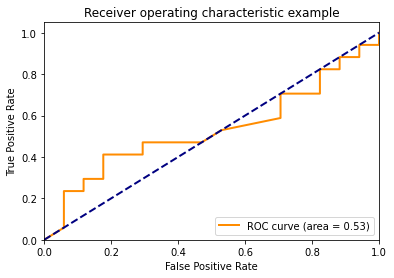

The best performance from the leave-one-out cross-validation:
0.7317073170731707
The parameters for the optimal model:
{'max_depth': 3, 'max_features': 12}
[[ 9 12]
 [11  9]]
              precision    recall  f1-score   support

         0.0       0.45      0.43      0.44        21
         1.0       0.43      0.45      0.44        20

    accuracy                           0.44        41
   macro avg       0.44      0.44      0.44        41
weighted avg       0.44      0.44      0.44        41

0.43902439024390244


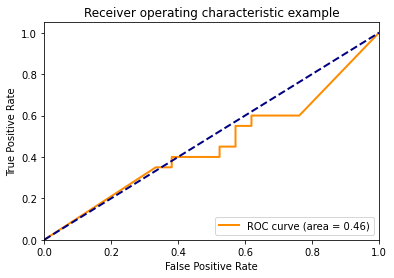

The best performance from the leave-one-out cross-validation:
0.7142857142857143
The parameters for the optimal model:
{'max_depth': 5, 'max_features': 18}
[[12  6]
 [ 7 10]]
              precision    recall  f1-score   support

         0.0       0.63      0.67      0.65        18
         1.0       0.62      0.59      0.61        17

    accuracy                           0.63        35
   macro avg       0.63      0.63      0.63        35
weighted avg       0.63      0.63      0.63        35

0.6285714285714286


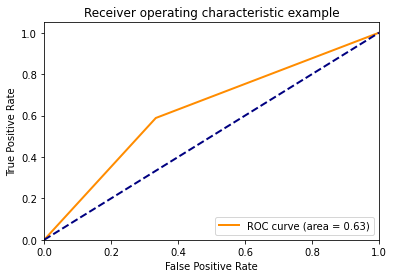

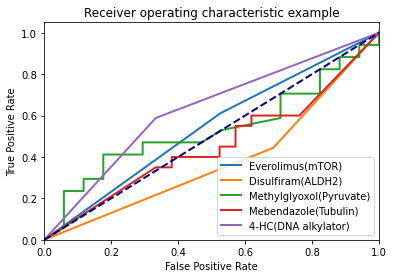

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def knn_gridsearch_evaluate(X, y):
    knn = DecisionTreeClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'max_depth': range(1,11),
               'max_features': range(10,50)}
    # apply LOOCV
    cv = LeaveOneOut()
    
    # use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, n_jobs=-1) # Turn on cv train scores
    # fit model to data
    knn_gscv.fit(X, y)
    
    # check score for the top performing value of n_neighbors
    print("The best performance from the leave-one-out cross-validation:")
    print(knn_gscv.best_score_)
    
    # check the optimal parameters
    print("The parameters for the optimal model:")
    print(knn_gscv.best_params_)
    
    kf = KFold(n_splits=len(X))

    y_pred_list = []
    y_pred_proba_list = []
    knn_best = knn_gscv.best_estimator_
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn_best.fit(X_train, y_train)
        y_pred = knn_best.predict(X_test)
        y_score = knn_best.predict_proba(X_test)[:,1]
        y_pred_list.append(y_pred)
        y_pred_proba_list.append(y_score)
        
    print(confusion_matrix(y, y_pred_list))
    print(classification_report(y, y_pred_list))
    print(accuracy_score(y, y_pred_list))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_list, drop_intermediate=False, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_pred_proba_list))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc.png') # can save to a file
    
    return fpr, tpr

if __name__ == '__main__':
    df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
    df_T = df.T
    df_features = df.iloc[5:].T
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = df_features.loc[df_y1.index]
    df_X2 = df_features.loc[df_y2.index]
    df_X3 = df_features.loc[df_y3.index]
    df_X4 = df_features.loc[df_y4.index]
    df_X5 = df_features.loc[df_y5.index]

    scaler = StandardScaler()
    df_X1_zscore = scaler.fit_transform(df_X1)
    df_X2_zscore = scaler.fit_transform(df_X2)
    df_X3_zscore = scaler.fit_transform(df_X3)
    df_X4_zscore = scaler.fit_transform(df_X4)
    df_X5_zscore = scaler.fit_transform(df_X5)

    # KNN
    fpr1_z, tpr1_z = knn_gridsearch_evaluate(df_X1_zscore, df_y1.values)
    fpr2_z, tpr2_z = knn_gridsearch_evaluate(df_X2_zscore, df_y2.values)
    fpr3_z, tpr3_z = knn_gridsearch_evaluate(df_X3_zscore, df_y3.values)
    fpr4_z, tpr4_z = knn_gridsearch_evaluate(df_X4_zscore, df_y4.values)
    fpr5_z, tpr5_z = knn_gridsearch_evaluate(df_X5_zscore, df_y5.values)

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1_z, tpr1_z,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2_z, tpr2_z,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3_z, tpr3_z,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4_z, tpr4_z,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5_z, tpr5_z,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc_all_z.png')
    

    


The best performance from the leave-one-out cross-validation:
0.7297297297297297
The parameters for the optimal model:
{'max_depth': 7, 'max_features': 13}
[[12  7]
 [ 5 13]]
              precision    recall  f1-score   support

         0.0       0.71      0.63      0.67        19
         1.0       0.65      0.72      0.68        18

    accuracy                           0.68        37
   macro avg       0.68      0.68      0.68        37
weighted avg       0.68      0.68      0.68        37

0.6756756756756757


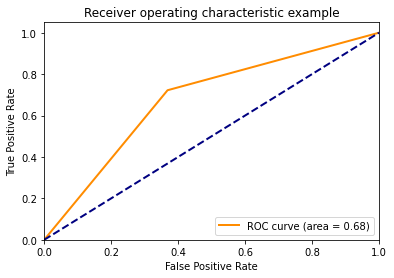

The best performance from the leave-one-out cross-validation:
0.6756756756756757
The parameters for the optimal model:
{'max_depth': 2, 'max_features': 17}
[[12  7]
 [ 7 11]]
              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63        19
         1.0       0.61      0.61      0.61        18

    accuracy                           0.62        37
   macro avg       0.62      0.62      0.62        37
weighted avg       0.62      0.62      0.62        37

0.6216216216216216


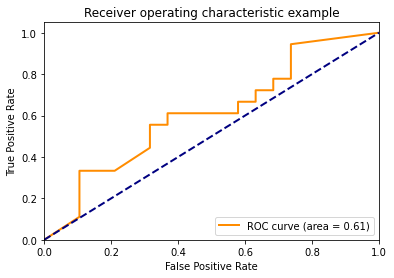

The best performance from the leave-one-out cross-validation:
0.7647058823529411
The parameters for the optimal model:
{'max_depth': 2, 'max_features': 17}
[[11  6]
 [ 6 11]]
              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65        17
         1.0       0.65      0.65      0.65        17

    accuracy                           0.65        34
   macro avg       0.65      0.65      0.65        34
weighted avg       0.65      0.65      0.65        34

0.6470588235294118


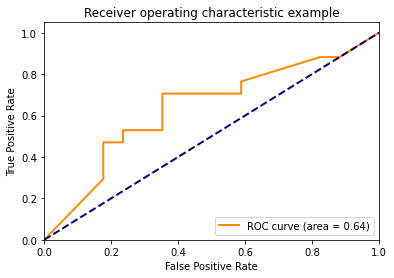

The best performance from the leave-one-out cross-validation:
0.7317073170731707
The parameters for the optimal model:
{'max_depth': 7, 'max_features': 17}
[[15  6]
 [10 10]]
              precision    recall  f1-score   support

         0.0       0.60      0.71      0.65        21
         1.0       0.62      0.50      0.56        20

    accuracy                           0.61        41
   macro avg       0.61      0.61      0.60        41
weighted avg       0.61      0.61      0.61        41

0.6097560975609756


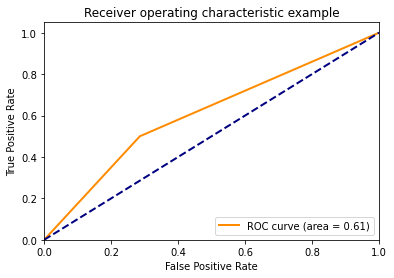

The best performance from the leave-one-out cross-validation:
0.6571428571428571
The parameters for the optimal model:
{'max_depth': 9, 'max_features': 16}
[[ 5 13]
 [10  7]]
              precision    recall  f1-score   support

         0.0       0.33      0.28      0.30        18
         1.0       0.35      0.41      0.38        17

    accuracy                           0.34        35
   macro avg       0.34      0.34      0.34        35
weighted avg       0.34      0.34      0.34        35

0.34285714285714286


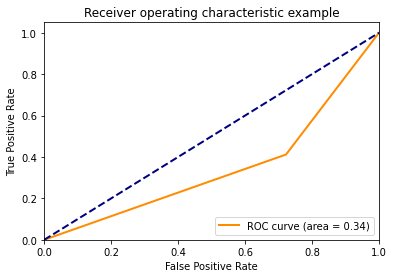

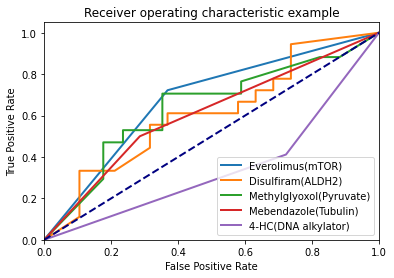

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def knn_gridsearch_evaluate(X, y):
    knn = DecisionTreeClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'max_depth': range(1,11),
               'max_features': range(10,20)}
    # apply LOOCV
    cv = LeaveOneOut()
    
    # use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, n_jobs=-1) # Turn on cv train scores
    # fit model to data
    knn_gscv.fit(X, y)
    
    # check score for the top performing value of n_neighbors
    print("The best performance from the leave-one-out cross-validation:")
    print(knn_gscv.best_score_)
    
    # check the optimal parameters
    print("The parameters for the optimal model:")
    print(knn_gscv.best_params_)
    
    kf = KFold(n_splits=len(X))

    y_pred_list = []
    y_pred_proba_list = []
    knn_best = knn_gscv.best_estimator_
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn_best.fit(X_train, y_train)
        y_pred = knn_best.predict(X_test)
        y_score = knn_best.predict_proba(X_test)[:,1]
        y_pred_list.append(y_pred)
        y_pred_proba_list.append(y_score)
        
    print(confusion_matrix(y, y_pred_list))
    print(classification_report(y, y_pred_list))
    print(accuracy_score(y, y_pred_list))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_list, drop_intermediate=False, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_pred_proba_list))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc.png') # can save to a file
    
    return fpr, tpr

if __name__ == '__main__':
    df_T = pd.read_csv("DREAM_data_T.csv")
    
    df_features = df_T.iloc[:,6:]
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = df_features.iloc[df_y1.index]
    df_X2 = df_features.iloc[df_y2.index]
    df_X3 = df_features.iloc[df_y3.index]
    df_X4 = df_features.iloc[df_y4.index]
    df_X5 = df_features.iloc[df_y5.index]



    # KNN
    fpr1_z, tpr1_z = knn_gridsearch_evaluate(df_X1.to_numpy(), df_y1.values)
    fpr2_z, tpr2_z = knn_gridsearch_evaluate(df_X2.to_numpy(), df_y2.values)
    fpr3_z, tpr3_z = knn_gridsearch_evaluate(df_X3.to_numpy(), df_y3.values)
    fpr4_z, tpr4_z = knn_gridsearch_evaluate(df_X4.to_numpy(), df_y4.values)
    fpr5_z, tpr5_z = knn_gridsearch_evaluate(df_X5.to_numpy(), df_y5.values)

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1_z, tpr1_z,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2_z, tpr2_z,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3_z, tpr3_z,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4_z, tpr4_z,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5_z, tpr5_z,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc_all_z.png')
    


The best performance from the leave-one-out cross-validation:
0.7837837837837838
The parameters for the optimal model:
{'max_depth': 5, 'max_features': 31}
[[12  7]
 [ 8 10]]
              precision    recall  f1-score   support

         0.0       0.60      0.63      0.62        19
         1.0       0.59      0.56      0.57        18

    accuracy                           0.59        37
   macro avg       0.59      0.59      0.59        37
weighted avg       0.59      0.59      0.59        37

0.5945945945945946


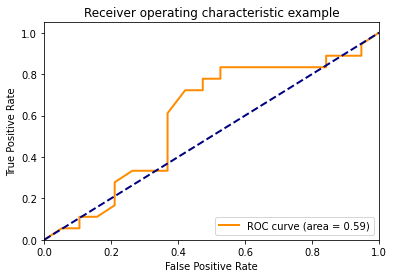

The best performance from the leave-one-out cross-validation:
0.6756756756756757
The parameters for the optimal model:
{'max_depth': 4, 'max_features': 24}
[[13  6]
 [13  5]]
              precision    recall  f1-score   support

         0.0       0.50      0.68      0.58        19
         1.0       0.45      0.28      0.34        18

    accuracy                           0.49        37
   macro avg       0.48      0.48      0.46        37
weighted avg       0.48      0.49      0.46        37

0.4864864864864865


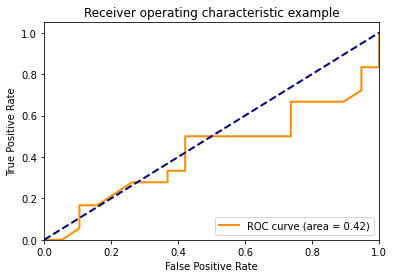

The best performance from the leave-one-out cross-validation:
0.8529411764705882
The parameters for the optimal model:
{'max_depth': 1, 'max_features': 10}
[[12  5]
 [ 4 13]]
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73        17
         1.0       0.72      0.76      0.74        17

    accuracy                           0.74        34
   macro avg       0.74      0.74      0.74        34
weighted avg       0.74      0.74      0.74        34

0.7352941176470589


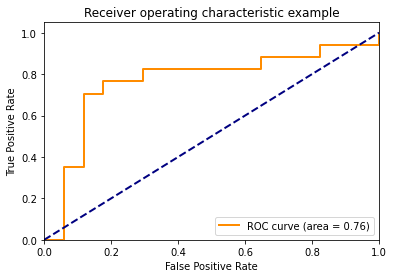

The best performance from the leave-one-out cross-validation:
0.7317073170731707
The parameters for the optimal model:
{'max_depth': 5, 'max_features': 15}
[[13  8]
 [ 9 11]]
              precision    recall  f1-score   support

         0.0       0.59      0.62      0.60        21
         1.0       0.58      0.55      0.56        20

    accuracy                           0.59        41
   macro avg       0.58      0.58      0.58        41
weighted avg       0.59      0.59      0.58        41

0.5853658536585366


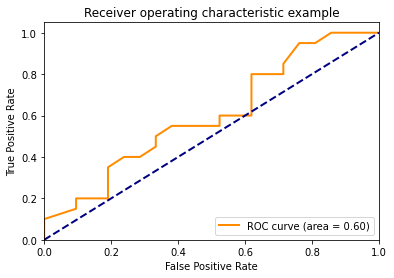

The best performance from the leave-one-out cross-validation:
0.5714285714285714
The parameters for the optimal model:
{'max_depth': 9, 'max_features': 33}
[[ 6 12]
 [11  6]]
              precision    recall  f1-score   support

         0.0       0.35      0.33      0.34        18
         1.0       0.33      0.35      0.34        17

    accuracy                           0.34        35
   macro avg       0.34      0.34      0.34        35
weighted avg       0.34      0.34      0.34        35

0.34285714285714286


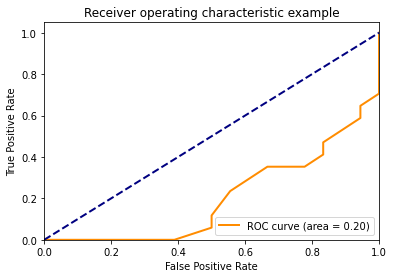

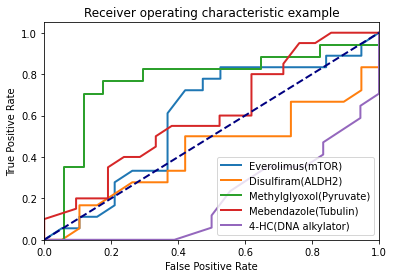

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def knn_gridsearch_evaluate(X, y):
    knn = RandomForestClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'max_depth': range(1,11),
               'max_features': range(10,50)}
    # apply LOOCV
    cv = LeaveOneOut()
    
    # use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, n_jobs=-1) # Turn on cv train scores
    # fit model to data
    knn_gscv.fit(X, y)
    
    # check score for the top performing value of n_neighbors
    print("The best performance from the leave-one-out cross-validation:")
    print(knn_gscv.best_score_)
    
    # check the optimal parameters
    print("The parameters for the optimal model:")
    print(knn_gscv.best_params_)
    
    kf = KFold(n_splits=len(X))

    y_pred_list = []
    y_pred_proba_list = []
    knn_best = knn_gscv.best_estimator_
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn_best.fit(X_train, y_train)
        y_pred = knn_best.predict(X_test)
        y_score = knn_best.predict_proba(X_test)[:,1]
        y_pred_list.append(y_pred)
        y_pred_proba_list.append(y_score)
        
    print(confusion_matrix(y, y_pred_list))
    print(classification_report(y, y_pred_list))
    print(accuracy_score(y, y_pred_list))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_list, drop_intermediate=False, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_pred_proba_list))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc.png') # can save to a file
    
    return fpr, tpr

if __name__ == '__main__':
    df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
    df_T = df.T
    df_features = df.iloc[5:].T
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = df_features.loc[df_y1.index]
    df_X2 = df_features.loc[df_y2.index]
    df_X3 = df_features.loc[df_y3.index]
    df_X4 = df_features.loc[df_y4.index]
    df_X5 = df_features.loc[df_y5.index]

    scaler = StandardScaler()
    df_X1_zscore = scaler.fit_transform(df_X1)
    df_X2_zscore = scaler.fit_transform(df_X2)
    df_X3_zscore = scaler.fit_transform(df_X3)
    df_X4_zscore = scaler.fit_transform(df_X4)
    df_X5_zscore = scaler.fit_transform(df_X5)

    # KNN
    fpr1_z, tpr1_z = knn_gridsearch_evaluate(df_X1_zscore, df_y1.values)
    fpr2_z, tpr2_z = knn_gridsearch_evaluate(df_X2_zscore, df_y2.values)
    fpr3_z, tpr3_z = knn_gridsearch_evaluate(df_X3_zscore, df_y3.values)
    fpr4_z, tpr4_z = knn_gridsearch_evaluate(df_X4_zscore, df_y4.values)
    fpr5_z, tpr5_z = knn_gridsearch_evaluate(df_X5_zscore, df_y5.values)

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1_z, tpr1_z,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2_z, tpr2_z,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3_z, tpr3_z,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4_z, tpr4_z,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5_z, tpr5_z,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc_all_z.png')
    


The best performance from the leave-one-out cross-validation:
0.7567567567567568
The parameters for the optimal model:
{'max_depth': 3, 'max_features': 16}
[[13  6]
 [ 3 15]]
              precision    recall  f1-score   support

         0.0       0.81      0.68      0.74        19
         1.0       0.71      0.83      0.77        18

    accuracy                           0.76        37
   macro avg       0.76      0.76      0.76        37
weighted avg       0.76      0.76      0.76        37

0.7567567567567568


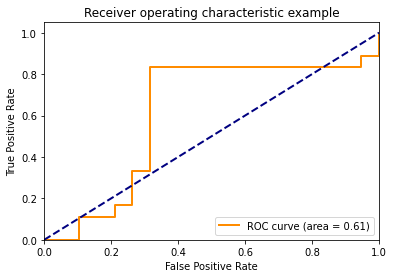

The best performance from the leave-one-out cross-validation:
0.7297297297297297
The parameters for the optimal model:
{'max_depth': 7, 'max_features': 17}
[[12  7]
 [ 9  9]]
              precision    recall  f1-score   support

         0.0       0.57      0.63      0.60        19
         1.0       0.56      0.50      0.53        18

    accuracy                           0.57        37
   macro avg       0.57      0.57      0.56        37
weighted avg       0.57      0.57      0.57        37

0.5675675675675675


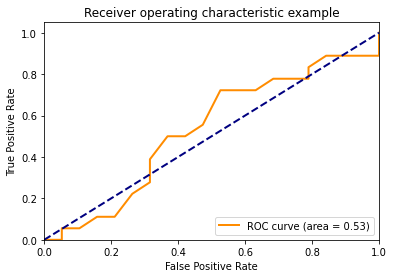

The best performance from the leave-one-out cross-validation:
0.8529411764705882
The parameters for the optimal model:
{'max_depth': 3, 'max_features': 10}
[[13  4]
 [ 3 14]]
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79        17
         1.0       0.78      0.82      0.80        17

    accuracy                           0.79        34
   macro avg       0.80      0.79      0.79        34
weighted avg       0.80      0.79      0.79        34

0.7941176470588235


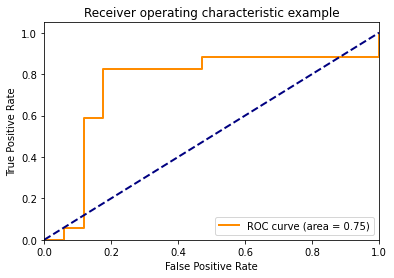

The best performance from the leave-one-out cross-validation:
0.6829268292682927
The parameters for the optimal model:
{'max_depth': 3, 'max_features': 14}
[[13  8]
 [11  9]]
              precision    recall  f1-score   support

         0.0       0.54      0.62      0.58        21
         1.0       0.53      0.45      0.49        20

    accuracy                           0.54        41
   macro avg       0.54      0.53      0.53        41
weighted avg       0.54      0.54      0.53        41

0.5365853658536586


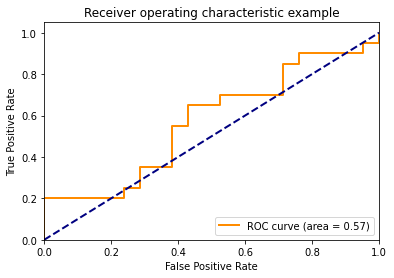

The best performance from the leave-one-out cross-validation:
0.5142857142857142
The parameters for the optimal model:
{'max_depth': 5, 'max_features': 17}
[[ 8 10]
 [12  5]]
              precision    recall  f1-score   support

         0.0       0.40      0.44      0.42        18
         1.0       0.33      0.29      0.31        17

    accuracy                           0.37        35
   macro avg       0.37      0.37      0.37        35
weighted avg       0.37      0.37      0.37        35

0.37142857142857144


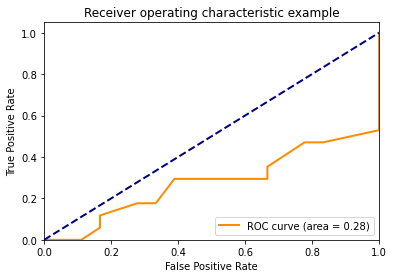

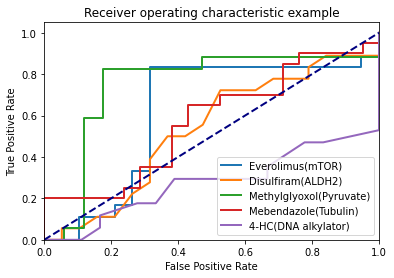

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def knn_gridsearch_evaluate(X, y):
    knn = RandomForestClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'max_depth': range(1,11),
               'max_features': range(10,20)}
    # apply LOOCV
    cv = LeaveOneOut()
    
    # use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, n_jobs=-1) # Turn on cv train scores
    # fit model to data
    knn_gscv.fit(X, y)
    
    # check score for the top performing value of n_neighbors
    print("The best performance from the leave-one-out cross-validation:")
    print(knn_gscv.best_score_)
    
    # check the optimal parameters
    print("The parameters for the optimal model:")
    print(knn_gscv.best_params_)
    
    kf = KFold(n_splits=len(X))

    y_pred_list = []
    y_pred_proba_list = []
    knn_best = knn_gscv.best_estimator_
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn_best.fit(X_train, y_train)
        y_pred = knn_best.predict(X_test)
        y_score = knn_best.predict_proba(X_test)[:,1]
        y_pred_list.append(y_pred)
        y_pred_proba_list.append(y_score)
        
    print(confusion_matrix(y, y_pred_list))
    print(classification_report(y, y_pred_list))
    print(accuracy_score(y, y_pred_list))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_list, drop_intermediate=False, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_pred_proba_list))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc.png') # can save to a file
    
    return fpr, tpr

if __name__ == '__main__':
    df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
    df_T = df.T
    df_features = df.iloc[5:].T
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = df_features.loc[df_y1.index]
    df_X2 = df_features.loc[df_y2.index]
    df_X3 = df_features.loc[df_y3.index]
    df_X4 = df_features.loc[df_y4.index]
    df_X5 = df_features.loc[df_y5.index]

    
    # KNN
    fpr1_z, tpr1_z = knn_gridsearch_evaluate(df_X1.to_numpy(), df_y1.values)
    fpr2_z, tpr2_z = knn_gridsearch_evaluate(df_X2.to_numpy(), df_y2.values)
    fpr3_z, tpr3_z = knn_gridsearch_evaluate(df_X3.to_numpy(), df_y3.values)
    fpr4_z, tpr4_z = knn_gridsearch_evaluate(df_X4.to_numpy(), df_y4.values)
    fpr5_z, tpr5_z = knn_gridsearch_evaluate(df_X5.to_numpy(), df_y5.values)

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1_z, tpr1_z,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2_z, tpr2_z,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3_z, tpr3_z,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4_z, tpr4_z,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5_z, tpr5_z,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc_all_z.png')
    


The best performance from the leave-one-out cross-validation:
0.7567567567567568
The parameters for the optimal model:
{'metric': 'correlation', 'n_neighbors': 8, 'weights': 'distance'}
[[13  6]
 [ 3 15]]
              precision    recall  f1-score   support

         0.0       0.81      0.68      0.74        19
         1.0       0.71      0.83      0.77        18

    accuracy                           0.76        37
   macro avg       0.76      0.76      0.76        37
weighted avg       0.76      0.76      0.76        37

0.7567567567567568


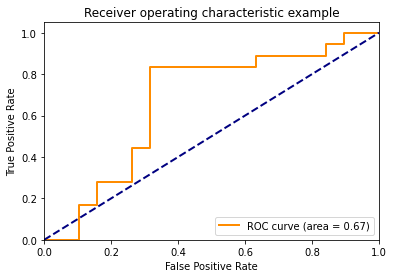

The best performance from the leave-one-out cross-validation:
0.7567567567567568
The parameters for the optimal model:
{'metric': 'correlation', 'n_neighbors': 6, 'weights': 'distance'}
[[13  6]
 [ 3 15]]
              precision    recall  f1-score   support

         0.0       0.81      0.68      0.74        19
         1.0       0.71      0.83      0.77        18

    accuracy                           0.76        37
   macro avg       0.76      0.76      0.76        37
weighted avg       0.76      0.76      0.76        37

0.7567567567567568


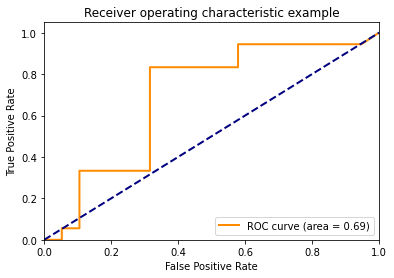

The best performance from the leave-one-out cross-validation:
0.8529411764705882
The parameters for the optimal model:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
[[15  2]
 [ 3 14]]
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86        17
         1.0       0.88      0.82      0.85        17

    accuracy                           0.85        34
   macro avg       0.85      0.85      0.85        34
weighted avg       0.85      0.85      0.85        34

0.8529411764705882


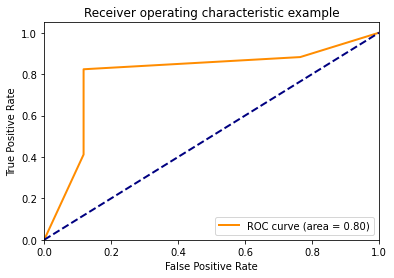

The best performance from the leave-one-out cross-validation:
0.7560975609756098
The parameters for the optimal model:
{'metric': 'correlation', 'n_neighbors': 1, 'weights': 'uniform'}
[[16  5]
 [ 5 15]]
              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76        21
         1.0       0.75      0.75      0.75        20

    accuracy                           0.76        41
   macro avg       0.76      0.76      0.76        41
weighted avg       0.76      0.76      0.76        41

0.7560975609756098


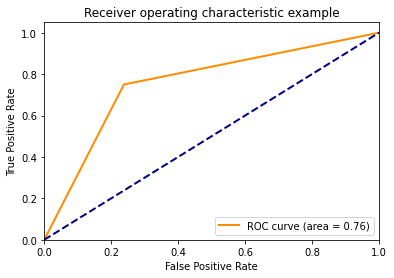

The best performance from the leave-one-out cross-validation:
0.6571428571428571
The parameters for the optimal model:
{'metric': 'correlation', 'n_neighbors': 1, 'weights': 'uniform'}
[[10  8]
 [ 4 13]]
              precision    recall  f1-score   support

         0.0       0.71      0.56      0.63        18
         1.0       0.62      0.76      0.68        17

    accuracy                           0.66        35
   macro avg       0.67      0.66      0.65        35
weighted avg       0.67      0.66      0.65        35

0.6571428571428571


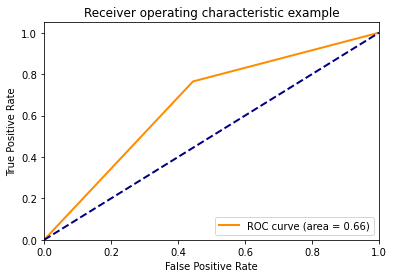

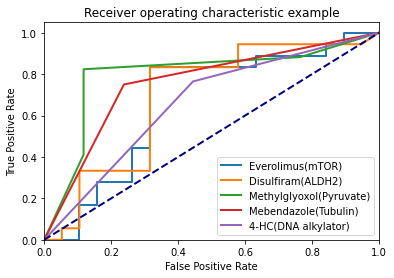

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def knn_gridsearch_evaluate(X, y):
    knn = KNeighborsClassifier()
    #create a dictionary of all values we want to test for n_neighbors
    param_grid = {'n_neighbors': np.arange(1, 10),
                 'metric': ['euclidean','correlation','manhattan'],
                 'weights':['uniform', 'distance']}
    # apply LOOCV
    cv = LeaveOneOut()
    
    # use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, n_jobs=-1) # Turn on cv train scores
    # fit model to data
    knn_gscv.fit(X, y)
    
    # check score for the top performing value of n_neighbors
    print("The best performance from the leave-one-out cross-validation:")
    print(knn_gscv.best_score_)
    
    # check the optimal parameters
    print("The parameters for the optimal model:")
    print(knn_gscv.best_params_)
    
    kf = KFold(n_splits=len(X))

    y_pred_list = []
    y_pred_proba_list = []
    knn_best = knn_gscv.best_estimator_
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn_best.fit(X_train, y_train)
        y_pred = knn_best.predict(X_test)
        y_score = knn_best.predict_proba(X_test)[:,1]
        y_pred_list.append(y_pred)
        y_pred_proba_list.append(y_score)
        
    print(confusion_matrix(y, y_pred_list))
    print(classification_report(y, y_pred_list))
    print(accuracy_score(y, y_pred_list))
    
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_list, drop_intermediate=False, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y, y_pred_proba_list))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc.png') # can save to a file
    
    return fpr, tpr

if __name__ == '__main__':
    df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
    df_T = df.T
    df_features = df.iloc[5:].T
    
    # y1~y5, X1~X5
    df_y1 = df_T['Everolimus(mTOR)'].dropna()
    df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
    df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
    df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
    df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

    df_X1 = df_features.loc[df_y1.index]
    df_X2 = df_features.loc[df_y2.index]
    df_X3 = df_features.loc[df_y3.index]
    df_X4 = df_features.loc[df_y4.index]
    df_X5 = df_features.loc[df_y5.index]

    scaler = StandardScaler()
    df_X1_zscore = scaler.fit_transform(df_X1)
    df_X2_zscore = scaler.fit_transform(df_X2)
    df_X3_zscore = scaler.fit_transform(df_X3)
    df_X4_zscore = scaler.fit_transform(df_X4)
    df_X5_zscore = scaler.fit_transform(df_X5)

    # KNN
    fpr1_z, tpr1_z = knn_gridsearch_evaluate(df_X1_zscore, df_y1.values)
    fpr2_z, tpr2_z = knn_gridsearch_evaluate(df_X2_zscore, df_y2.values)
    fpr3_z, tpr3_z = knn_gridsearch_evaluate(df_X3_zscore, df_y3.values)
    fpr4_z, tpr4_z = knn_gridsearch_evaluate(df_X4_zscore, df_y4.values)
    fpr5_z, tpr5_z = knn_gridsearch_evaluate(df_X5_zscore, df_y5.values)

    # Plot all ROC curves on one figure
    plt.figure()
    lw = 2
    plt.plot(fpr1_z, tpr1_z,
                 lw=lw, label='Everolimus(mTOR)')
    plt.plot(fpr2_z, tpr2_z,
                 lw=lw, label='Disulfiram(ALDH2)')
    plt.plot(fpr3_z, tpr3_z,
                 lw=lw, label='Methylglyoxol(Pyruvate)')
    plt.plot(fpr4_z, tpr4_z,
                 lw=lw, label='Mebendazole(Tubulin)')
    plt.plot(fpr5_z, tpr5_z,
                 lw=lw, label='4-HC(DNA alkylator)')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    #plt.savefig('roc_all_z.png')
    


In [10]:
df = pd.read_csv("DREAM_data.txt", sep="\t", index_col=0)
df_T = df.T
c= df.iloc[5:].T
    
    # y1~y5, X1~X5
df_y1 = df_T['Everolimus(mTOR)'].dropna()
df_y2 = df_T['Disulfiram(ALDH2)'].dropna()
df_y3 = df_T['Methylglyoxol(Pyruvate)'].dropna()
df_y4 = df_T['Mebendazole(Tubulin)'].dropna()
df_y5 = df_T['4-HC(DNA alkylator)'].dropna()

In [11]:
df_y1.index

Index(['184B5', '600MPE', 'BT474', 'BT483', 'CAMA1', 'HCC38', 'HCC70',
       'HCC1143', 'HCC1395', 'HCC1419', 'HCC1428', 'HCC1806', 'HCC1937',
       'HCC2185', 'HCC3153', 'LY2', 'MCF12A', 'MCF10F', 'MCF7', 'MDAMB134VI',
       'MDAMB157', 'MDAMB175VII', 'MDAMB231', 'MDAMB415', 'MDAMB453', 'SKBR3',
       'SUM52PE', 'SUM149PT', 'SUM159PT', 'SUM185PE', 'SUM225CWN',
       'SUM1315MO2', 'T47D', 'UACC812', 'ZR751', 'BT549', 'MCF10A'],
      dtype='object')

In [12]:
df_T.head()

HGNC_ID,Everolimus(mTOR),Disulfiram(ALDH2),Methylglyoxol(Pyruvate),Mebendazole(Tubulin),4-HC(DNA alkylator),C9orf152,ELMO2,RPS11,CREB3L1,PNMA1,...,GRIP2,GOLGA8B,GPLD1,RAB8A,RXFP2,PIK3IP1,SNRPD2,SLC39A6,CTSC,AQP7
184B5,0.0,0.0,NaN,NaN,NaN,3.613030,7.205940,10.476276,5.565989,7.664038,...,6.164306,4.648155,3.741650,8.103385,3.035962,5.094983,8.347877,9.560331,8.014001,5.611784
600MPE,0.0,1.0,0.0,0.0,0.0,8.463736,7.959597,9.939852,9.835957,7.645439,...,5.716731,5.082299,3.848673,9.345093,3.042711,5.838762,8.134302,9.230374,5.489988,5.135123
AU565,NaN,1.0,1.0,1.0,1.0,7.935823,8.073369,9.817430,5.696639,7.761882,...,6.133836,4.844242,4.605217,9.343916,2.862658,5.259975,8.465382,8.702158,6.926434,5.309263
BT20,NaN,1.0,NaN,0.0,1.0,3.098928,8.164778,10.038500,4.972852,7.766212,...,5.777977,5.019017,3.948915,9.465953,2.781718,4.581164,8.861059,6.829949,6.706568,5.232824
BT474,1.0,0.0,1.0,1.0,0.0,9.010836,8.120015,9.533423,8.155372,8.393242,...,5.780276,5.151477,4.066432,8.841824,2.879156,6.680903,8.264550,9.895278,4.959705,5.212809


In [13]:
df_features.head()

HGNC_ID,C9orf152,ELMO2,RPS11,CREB3L1,PNMA1,MMP2,C10orf90,ERCC5,ZHX3,GPR98,...,GRIP2,GOLGA8B,GPLD1,RAB8A,RXFP2,PIK3IP1,SNRPD2,SLC39A6,CTSC,AQP7
184B5,3.613030,7.205940,10.476276,5.565989,7.664038,5.108659,4.128089,7.263226,5.742329,3.671584,...,6.164306,4.648155,3.741650,8.103385,3.035962,5.094983,8.347877,9.560331,8.014001,5.611784
600MPE,8.463736,7.959597,9.939852,9.835957,7.645439,4.611590,3.687597,7.450175,5.199320,5.755408,...,5.716731,5.082299,3.848673,9.345093,3.042711,5.838762,8.134302,9.230374,5.489988,5.135123
AU565,7.935823,8.073369,9.817430,5.696639,7.761882,4.765150,3.883901,7.204121,5.477589,6.198794,...,6.133836,4.844242,4.605217,9.343916,2.862658,5.259975,8.465382,8.702158,6.926434,5.309263
BT20,3.098928,8.164778,10.038500,4.972852,7.766212,4.657057,3.848230,7.758748,5.764572,3.560379,...,5.777977,5.019017,3.948915,9.465953,2.781718,4.581164,8.861059,6.829949,6.706568,5.232824
BT474,9.010836,8.120015,9.533423,8.155372,8.393242,4.584473,3.667176,6.542780,4.882232,4.810989,...,5.780276,5.151477,4.066432,8.841824,2.879156,6.680903,8.264550,9.895278,4.959705,5.212809


In [23]:
df_X1.to_numpy()

array([[ 3.61302998,  7.20593998, 10.47627563, ...,  9.56033097,
         8.01400054,  5.61178444],
       [ 8.46373639,  7.95959732,  9.9398516 , ...,  9.23037408,
         5.48998769,  5.13512339],
       [ 9.01083642,  8.1200146 ,  9.53342289, ...,  9.8952785 ,
         4.95970547,  5.21280894],
       ...,
       [ 9.30670992,  8.27416754,  9.33340871, ...,  9.95857732,
         5.91552073,  5.81641369],
       [ 3.31295384,  8.46350554,  9.6938856 , ...,  9.13694091,
         7.78707247,  5.14627935],
       [ 3.25746295,  7.3481646 ,  9.85823129, ...,  8.82616838,
         8.31530576,  5.49414523]])

In [26]:
df_y1.values

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0.])